In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

Vi skal udregne $\frac{d\tau}{da}= \frac{1}{a^2H(a)}$
$H_0 = 70 km/sMpc / (3\cdot 10^5 km/s)$
$a_0 = 10^{-14}$ til $a=1$


In [2]:
H0 = 70 / (3 * 1e5) # i 1/Mpc

a0 = 1e-5 
aend = 1 
steps = 10_000
Omega_lambda = 0.74 - 2 * 1e-5
Omega_M = 0.26- 2 * 1e-5
Omega_R = 4 * 1e-5
a = np.linspace(a0,aend,steps)

# udregning af Friedmanligningen
def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) # a**3 *

def f(t,y):
    a_current = t
    tau = y[0]
    d_tau = 1 / (a_current**2 * H(a_current))
    return np.array(d_tau)

tau0 = 1/H0 * Omega_R ** (-0.5) * a0
sol1 = sc.solve_ivp(f,t_span=[a0,aend],y0=[tau0],t_eval=a) 

tau =sol1.y[0]
print(f"{tau=}")



tau=array([6.77630927e+00, 6.46595387e+01, 1.12290516e+02, ...,
       1.48031359e+04, 1.48035646e+04, 1.48039932e+04])


[1.0000e-05 2.0000e-05 3.0000e-05 ... 9.9997e-01 9.9998e-01 9.9999e-01]


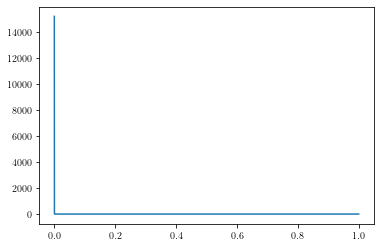

In [3]:
x = np.array([i for i in range(1,100000)]) *1e-5
print(x)

plt.plot(x,H(x))
plt.show()
#,method = "DOP853"

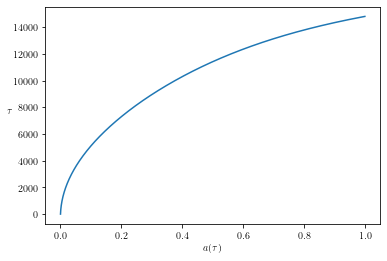

In [4]:
plt.plot(a,tau)
plt.xlabel(r"$a(\tau)$",rotation=0)
plt.ylabel(r"$\tau$",rotation=0)
plt.show()

In [9]:
# nu skal jeg bare have nogle start værdier

H0 = 70 / (3*1e5) # i 1/Mpc
cs = 135 * 3 * 1e-20 # det bud. jeg tog den værdi de havde angivet i artiklen og oversatte den til Mpc

C = 1e0 # dimensionsløs faktor til startværdierne fra B&M. 

k = 1e-5
N_nu = 3
R_nu = ((8/(7*N_nu))*(11/4)**(4/3) + 1 )**(-1)
delta_gamma = -2 / 3 * C * (k * tau[0])**2
delta_nu_0 = delta_gamma
delta_cb_0 = 4 / 3 * delta_gamma # *2 # muligvis et spørgsmål her er om delta_cb = delta_c + delta_b
theta_cb_0 = -1/18 * (k**4 * tau[0] ** 3)
theta_nu_0 = (23+4*R_nu)/(6*(15+4*R_nu)) * C * (k*tau[0])**2


y0 = np.array([a0,delta_cb_0,theta_cb_0,delta_nu_0,theta_nu_0])

t_start = tau[0]
t_end = tau[-1]
t_span = np.array([t_start,t_end])

def f(t,y):    
    a = y[0]
    if t == tau[0]:
        assert(k/ H(a) <1)
        print(a)
        
    delta_cb = y[1]
    theta_cb = y[2]
    delta_nu = y[3]
    theta_nu = y[4]
    
    d_a_dtau = a**2 * H(a)
    # poisson
    
    nabla2phi =(3/2) * H(a) ** 2  * Omega_M * a**2  *  (delta_nu + delta_cb)
    
    d_delta_cb_dtau = - theta_cb
    
    d_theta_cb_dtau = - a * H(a) * theta_cb -  nabla2phi
    
    d_delta_nu_dtau = - theta_nu
    
    d_theta_nu_dtau = - a * H(a) * theta_nu - nabla2phi - k*k * (cs*cs ) * delta_nu
    
    return [d_a_dtau,d_delta_cb_dtau,d_theta_cb_dtau,d_delta_nu_dtau,d_theta_nu_dtau]
    

sol2 = sc.solve_ivp(f,t_span,y0,t_eval = tau)

a        = sol2.y[0]
delta_cb = sol2.y[1]
theta_cb = sol2.y[2]
delta_ny = sol2.y[3]
theta_ny = sol2.y[4]

print("success")


1e-05
success


In [10]:
print(100000000000000000*1e-17)

1.0


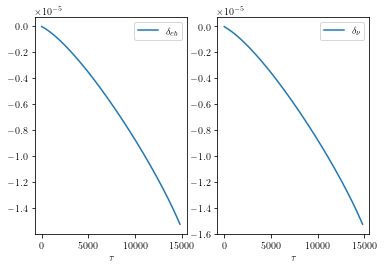

In [11]:
N = 10000
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(tau,delta_cb,label=r"$\delta_{cb}$")
axes[1].plot(tau,delta_ny,label=r"$\delta_{\nu}$")

axes[0].set(xlabel=r"$\tau$")
axes[1].set(xlabel=r"$\tau$")

axes[0].legend(loc="upper right")
axes[1].legend(loc="upper right")

# Det er ikke overraskende at de er næsten identiske, da 
# k = 1e-8

plt.show()

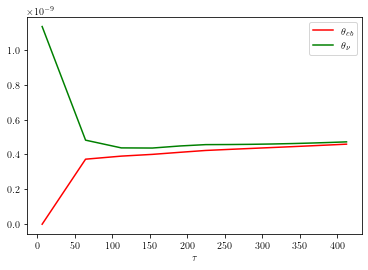

In [12]:
n = 13

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(tau[:n],theta_cb[:n],label=r'$\theta_{cb}$',color="red")
axes.plot(tau[:n],theta_ny[:n],label=r'$\theta_{\nu}$',color="green")
axes.set(xlabel=r'$\tau$')
plt.legend()

plt.show()

Note to self. Der er et problem med H(a) der hopper alt for aggressivt fra a0 til a1 uanset om a0 er 1e-14 eller 1e-5
Det er umildbart også hvad der skaber det her shit.

$R_{\nu}$ udregning
$R_{\nu} = \frac{\rho_{\nu}}{\rho_{\gamma}+\rho_{\nu}} = \left(\frac{\rho_{\gamma}+\rho_{\nu}}{\rho_{\nu}}\right)^{-1}=\left(\frac{\rho_{\gamma}}{\rho_{\nu}}+1\right)^{-1}$
Som relation mellem neutrinoer og fotoner har vi
$\rho_{\nu}/\rho_{\gamma} = (7N_{\nu}/8)(4/11)^{4/3}\rightarrow\rho_{\gamma}/\rho_{\nu} = (8/7N_{\nu})(11/4)^{4/3}$
Det giver os
$R_{\nu} = \left(\frac{\rho_{\gamma}}{\rho_{\nu}}+1\right)^{-1}=\left((8/7N_{\nu})(11/4)^{4/3}+1\right)^{-1}$ hvor neutrino flavour antallet er sat til 3


In [13]:
H0 = 70 / (3 * 1e5) # i 1/Mpc

a0 = 1e-5 
aend = 1 
steps = 10_000
Omega_lambda = 0.74 - 2 * 1e-5
Omega_M = 0.26- 2 * 1e-5
Omega_R = 4 * 1e-5
a = np.linspace(a0,aend,steps)

# udregning af Friedmanligningen
def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) # a**3 *

def f(t,y):
    a_current = t
    tau = y[0]
    d_tau = 1 / (a_current**2 * H(a_current))
    return np.array(d_tau)

tau0 = 1/H0 * Omega_R ** (-0.5) * a0
sol1 = sc.solve_ivp(f,t_span=[a0,aend],y0=[tau0],t_eval=a) 

tau =sol1.y[0]
print(f"{tau=}")


tau=array([6.77630927e+00, 6.46595387e+01, 1.12290516e+02, ...,
       1.48031359e+04, 1.48035646e+04, 1.48039932e+04])


In [41]:
# nu skal jeg bare have nogle start værdier
C = 1e-5#00
N_nu = 3
R_nu = ( (8 / (7 * N_nu)) * (4/11) ** (-4 / 3) + 1 ) ** (-1)
#print(R_nu)
cs = 0#.1#e-20

def f(t,y):    
    a = y[0]
    delta_cb = y[1]
    theta_cb = y[2]
    delta_nu = y[3]
    theta_nu = y[4]
    k = y[5]
    if t == tau[0]:
        assert(k/ H(a) <1), "H(a) =%s, k = %s"  %(H(a) ,k)
    
    d_a_dtau = a ** 2 * H(a)
    nabla2phi =(3/2) * H(a) ** 2  * Omega_M * a ** 2  *  (delta_nu + delta_cb)
    d_delta_cb_dtau = - theta_cb    
    d_theta_cb_dtau = - a * H(a) * theta_cb -  nabla2phi    
    d_delta_nu_dtau = - theta_nu
    d_theta_nu_dtau = - a * H(a) * theta_nu - nabla2phi #- k*k * (cs*cs ) * delta_nu     
    return [d_a_dtau, d_delta_cb_dtau, d_theta_cb_dtau, d_delta_nu_dtau, d_theta_nu_dtau, 0]



# k skal logaritmisk gå fra 1e-5 til 10
n=10
k_list = np.array([10**(i/n) for i in range(-10*n,2*round(n))])
print(len(k_list))
# liste fra 1-e5 til 1
#k_List = np.linspace(0.00001,0.2,1000)

delta_nu_k = np.zeros(len(k_list))


t_start = tau[0]
t_end = tau[-1]
t_span = np.array([t_start,t_end])
i = 0

for k in k_list:
    
    delta_gamma = -(2 / 3) * C * (k * tau[0])**2
    delta_nu_0 = delta_gamma
    delta_cb_0 = 4 / 3 * delta_gamma 
    
    theta_cb_0 = -(1 / 18) * C * (k ** 4 * tau[0] ** 3)
    #print(f"{theta_cb_0=}")
    theta_nu_0 = (23 + 4 * R_nu) / (15 + 4 * R_nu) * theta_cb_0 # * C * (k * tau[0]) ** 2

    y0 = np.array([a0, delta_cb_0, theta_cb_0, delta_nu_0, theta_nu_0, k])
    #print(f"{y0=}")
    sol2 = sc.solve_ivp(f,t_span,y0,t_eval = tau)
    a        = sol2.y[0]
    delta_cb = sol2.y[1]
    theta_cb = sol2.y[2]
    delta_nu = sol2.y[3]
    theta_nu = sol2.y[4]
    
    delta_nu_k[i] = delta_nu[-1]
    if i%n==0:
        print(f"{delta_nu[0]=}",f"{delta_nu_k[i]=}")
    i += 1

print("success")


#plt.show()

120
delta_nu[0]=-3.0612244897959177e-24 delta_nu_k[i]=-7.297025357454053e-21
delta_nu[0]=-3.061224489795918e-22 delta_nu_k[i]=-7.297025357454044e-19
delta_nu[0]=-3.061224489795918e-20 delta_nu_k[i]=-7.297025357454044e-17
delta_nu[0]=-3.061224489795917e-18 delta_nu_k[i]=-7.29702535745373e-15
delta_nu[0]=-3.061224489795917e-16 delta_nu_k[i]=-7.297025357421531e-13
delta_nu[0]=-3.061224489795918e-14 delta_nu_k[i]=-7.297025354353231e-11
delta_nu[0]=-3.0612244897959177e-12 delta_nu_k[i]=-7.297026554377793e-09
delta_nu[0]=-3.0612244897959184e-10 delta_nu_k[i]=-7.305097813078933e-07
delta_nu[0]=-3.0612244897959183e-08 delta_nu_k[i]=-7.329292965589698e-05
delta_nu[0]=-3.0612244897959177e-06 delta_nu_k[i]=-0.006808465276716797
delta_nu[0]=-0.00030612244897959177 delta_nu_k[i]=2.3591174741289294
delta_nu[0]=-0.030612244897959183 delta_nu_k[i]=30620.37284088987
success


Text(0.5, 1.0, 'power spectrum af neutrinoer alpha version')

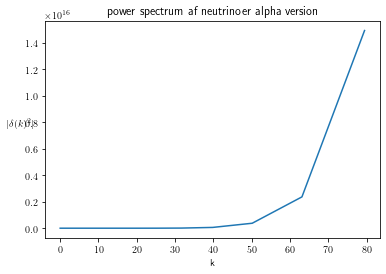

In [42]:
delta2 = np.power(np.abs(delta_nu_k),2)

#for i in range(len(delta_nu_k)):
 #   print(k_list[i],delta_nu_k[i],delta2[i])
    
    
plt.plot(k_list,delta2)#,s=0.5)
plt.xlabel("k")
plt.ylabel(r'$|\delta(k)^2|$',rotation=0)
plt.title("power spectrum af neutrinoer alpha version")

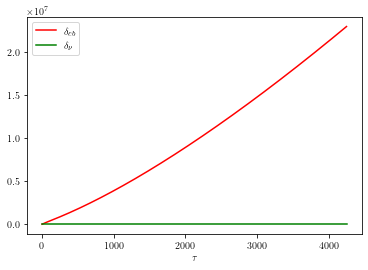

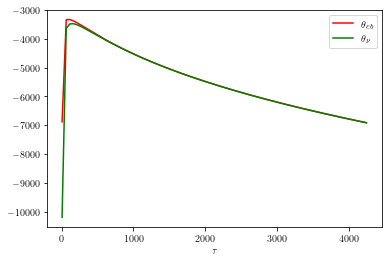

In [43]:
N = 700

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(tau[:N],delta_cb[:N],label=r'$\delta_{cb}$',color="red")
axes.plot(tau[:N],delta_ny[:N],label=r'$\delta_{\nu}$',color="green")
axes.set(xlabel=r'$\tau$')
plt.legend()


fig1, axes1 = plt.subplots(nrows=1, ncols=1)
axes1.plot(tau[:N],theta_cb[:N],label=r'$\theta_{cb}$',color="red")
axes1.plot(tau[:N],theta_ny[:N],label=r'$\theta_{\nu}$',color="green")
axes1.set(xlabel=r'$\tau$')
plt.legend()
plt.show()

Et forsøg på at normalisere a så vi undgår det der enorme spike for Friedman ligningen.

In [ ]:
### rigtig rigtig meget et work in progress

H0 = 70 / (3 * 1e5) # i 1/Mpc
num = 1e5 # numalisering
a0 = 1 #1e-5 * num
aend = 1e5 #* num
steps = int(1e4)
Omega_lambda = 0.74 - 2 * 1e-5
Omega_M = 0.26- 2 * 1e-5
Omega_R = 4 * 1e-5
a = np.linspace(a0,aend,steps)

# udregning af Friedmanligningen
def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M / ( a **3 ) + Omega_R /( a ** 4)) #* a ** 3 

def f(t,y):
    a_current = t
    tau = y[0]
    d_tau = 1 / (a_current ** 2 * H(a_current))
    return [d_tau]

tau0 = 1 / H0 * Omega_R ** (-0.5) * a0 
sol1 = sc.solve_ivp(f,t_span = [a0, aend],y0 = [tau0],t_eval = a)
#tau =sol1.y[0]
print(f"{tau=}")
